# Continuum Fit Checker

This notebook plots the observed spectrum with the modelled continuium in the CHAOS galaxies - one galaxy at a time

In [1]:
#import useful packages
import numpy as np
import matplotlib.pyplot as plt

Set up plotting parameters

In [2]:
# set up Latex & universal fontsize for plotting
plt.rc('text',usetex=True)
fontsize=15
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)

Pull galaxy information from files

In [3]:
# Read the files into arrays
regionName       = np.loadtxt("regions.list",  dtype=str)    # region name
observedFileName = np.loadtxt("origSpec.list", dtype=str)    # observed spectra
refitFileName    = np.loadtxt("refits.list",   dtype=str)    # refit continuum fits
nessFitFileName  = np.loadtxt("nessFits.list",   dtype=str)    # refit continuum fits

# Determine number of regions in our galaxy
nn = len(regionName)   

# Checking Continuum Fits with Observed Spectra
In this process we take the observed spectrum and subtract the refit of the continuum. 
By plotting all three spectra we can evaluate the continuum fit and the quality of the spectrum.

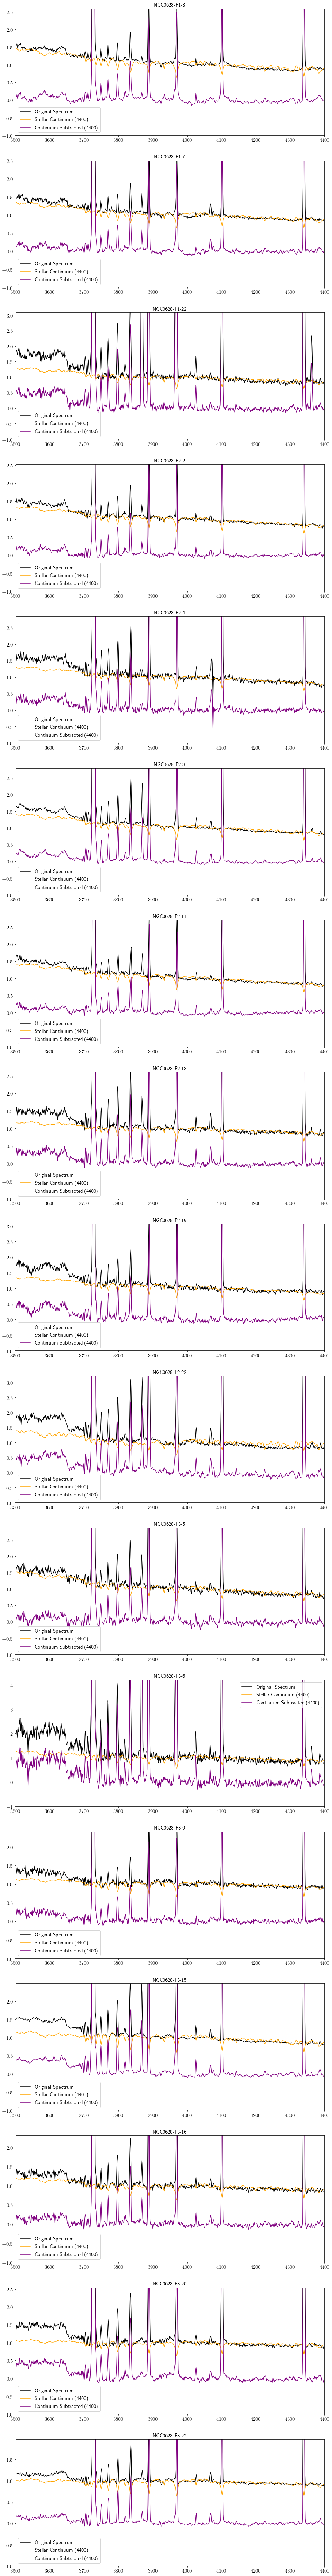

In [7]:
# Checking Continuum Fits
plt.figure(figsize=(16,8*nn))

for i in range(0,nn):
    region = regionName[i]
    observedFile = observedFileName[i] 
    refitFile = refitFileName[i]
    nessFitFile = nessFitFileName[i]

    #Pull Observed and Modelled Stellar Continuum - Find Nebular Spectrum by taking the difference
    wavelength, flux, err = np.loadtxt(observedFile, unpack=True, usecols=(0,1,2))
    wavelengthRF, fluxRF, errRF, contRF = np.loadtxt(refitFile, unpack=True, usecols=(0, 1, 2, 3))
    wavelengthNF, fluxNF, contNF, errNF = np.loadtxt(nessFitFile, unpack=True, usecols=(0, 1, 2, 3))
    wavelengthCS, contSubFlux = wavelengthRF, fluxRF-contRF
    wavelengthNCS, nessContSubFlux = wavelengthNF, fluxNF-contNF

    #Set up plotting parameters by analyzing the max and min of the spectra
    ymax = np.max(np.array(fluxNF[0:200]))
    ymin = np.min(np.array(nessContSubFlux))

    
    #Plot the various spectra for each region
    plt.subplot(nn,1,i+1)
    plt.title(region, fontsize = fontsize)
    plt.axis([3500, 4400,-1.,ymax*1.6])
    plt.plot(wavelengthNF,fluxNF,color='black', label='Original Spectrum')
    plt.plot(wavelengthNF,contNF,color='orange', label='Stellar Continuum (4400)')
    plt.plot(wavelengthNCS,nessContSubFlux,color='purple', label = 'Continuum Subtracted (4400)')    
    plt.legend(loc = 'best', fontsize = fontsize)
    
plt.savefig('ContinuumRefitsNGC0628_4400.pdf')    

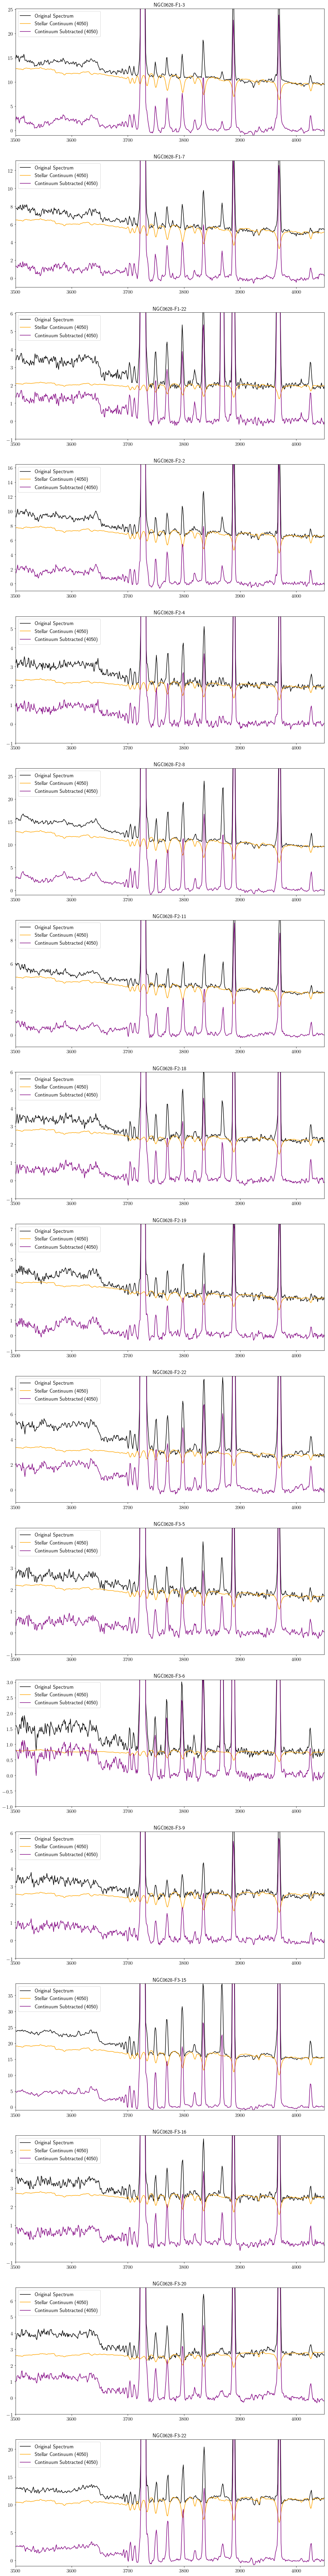

In [11]:
# Checking Continuum Fits
plt.figure(figsize=(16,8*nn))

for i in range(0,nn):
    region = regionName[i]
    observedFile = observedFileName[i] 
    refitFile = refitFileName[i]
    nessFitFile = nessFitFileName[i]

    #Pull Observed and Modelled Stellar Continuum - Find Nebular Spectrum by taking the difference
    wavelength, flux, err = np.loadtxt(observedFile, unpack=True, usecols=(0,1,2))
    wavelengthRF, fluxRF, errRF, contRF = np.loadtxt(refitFile, unpack=True, usecols=(0, 1, 2, 3))
    wavelengthCS, contSubFlux = wavelengthRF, fluxRF-contRF
    
    #Set up plotting parameters by analyzing the max and min of the spectra
    ymax = np.max(np.array(flux[0:200]))
    ymin = np.min(np.array(contSubFlux[0:550]))

    
    #Plot the various spectra for each region
    plt.subplot(nn,1,i+1)
    plt.title(region, fontsize = fontsize)
    plt.axis([3500, 4050,-1.,ymax*1.6])
    plt.plot(wavelengthRF,fluxRF,color='black', label='Original Spectrum')
    plt.plot(wavelengthRF,contRF,color='orange', label='Stellar Continuum (4050)')
    plt.plot(wavelengthCS,contSubFlux,color='purple', label = 'Continuum Subtracted (4050)')   
    plt.legend(loc = 'best', fontsize = fontsize)
    
plt.savefig('ContinuumRefitsNGC0628_4050.pdf')    